# Test 

In [2]:
cd ../..

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank


In [3]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import *


import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

### Tests

In [3]:
kappas = [1,0.7,0.5,0.5,0.3]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)
nb_place = len(kappas)
pas = 100
c = 0.5
env = Environment_PBM(thetas,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]
player_TSMH_pas = TS_MH(nb_prop,nb_place,part0,pas)
player_TSMH_10 = TS_MH(nb_prop,nb_place,part0,10)
player_TSMH_1000 = TS_MH(nb_prop,nb_place,part0,1000)
player_TS = ThompsonSamplingBernoulli_V0(nb_prop,nb_place)
player_E_greedy = Bandit_EGreedy_X_rep(c,nb_prop,nb_place)

player_Oracle = Oracle(env.get_best_index())
player_Random = Random(nb_prop,nb_place)



In [5]:
nb_trial = 1000
nb_game = 3
referee_TSMH = Referee(env,nb_trial)
referee_TSMH_1000 = Referee(env,nb_trial)
referee_TSMH_10 = Referee(env,nb_trial)
referee_TS = Referee(env,nb_trial)
referee_E_greedy = Referee(env,nb_trial)
referee_Oracle = Referee(env,nb_trial)
referee_Random = Referee(env,nb_trial)

In [6]:
for i in range(nb_game):
    print ('#### game '+str(i))
    %time print('TSMH',referee_TSMH.play_game(player_TSMH_pas))
    %time print('TS',referee_TS.play_game(player_TS))
    %time print('E_greedy',referee_E_greedy.play_game(player_E_greedy))
    %time print ('Oracle', referee_Oracle.play_game(player_Oracle))
    %time print('Random',referee_Random.play_game(player_Random))

#### game 0
TSMH 0.0
Wall time: 1min 37s
TSMH 0.0
Wall time: 11.6 s
TS 0.0
Wall time: 41.9 ms
E_greedy 0.49
Wall time: 35.9 ms
Oracle 0.0
Wall time: 5.95 ms
Random 1.3000000000000003
Wall time: 11 ms
#### game 1
TSMH 0.020000000000000018
Wall time: 1min 43s
TSMH 0.0
Wall time: 10.3 s
TS 0.0
Wall time: 44.9 ms
E_greedy 0.49
Wall time: 36.9 ms
Oracle 0.0
Wall time: 6.24 ms
Random 0.79
Wall time: 12 ms
#### game 2
TSMH 0.0
Wall time: 1min 45s
TSMH 0.0
Wall time: 10.6 s
TS 0.0
Wall time: 44.9 ms
E_greedy 0.49
Wall time: 47 ms
Oracle 0.0
Wall time: 8.97 ms
Random 0.2799999999999998
Wall time: 15 ms


In [18]:
for i in range (3) :
    print (i)
    %time print('TSMH_10',referee_TSMH_10.play_game(player_TSMH_10))
    %time print('TSMH_1000',referee_TSMH_1000.play_game(player_TSMH_1000))

0
TSMH_10 0.0
Wall time: 15.4 s
TSMH_1000 0.03000000000000025
Wall time: 46min 43s
1
TSMH_10 0.0
Wall time: 12.2 s
TSMH_1000 0.0
Wall time: 22min 40s
2
TSMH_10 0.0
Wall time: 16.8 s
TSMH_1000 0.0
Wall time: 22min 33s


In [14]:
print(referee_TSMH.expected_best_reward)
np.array(referee_TSMH.record_results['expected_reward'][0][:20])

1.37


array([1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37,
       1.37, 1.37, 1.37, 1.37, 1.28, 1.37, 1.37, 1.37, 1.37])

In [15]:
referee_TSMH.get_regret_expected()[:20]

array([0.   , 0.006, 0.   , 0.003, 0.007, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.009, 0.   , 0.   ,
       0.   , 0.   ])

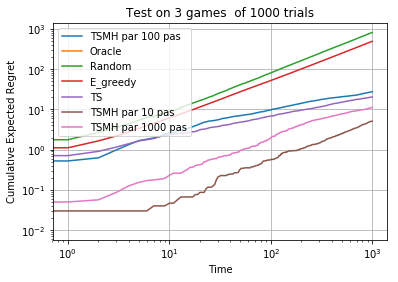

In [19]:
trials = [i for i in range(referee_TSMH.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH.get_regret_expected(), axis=0)[trials], label='TSMH par '+ str(pas) +" pas")
plt.plot(trials, np.cumsum(referee_Oracle.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_E_greedy.get_regret_expected(), axis=0)[trials], label='E_greedy')
plt.plot(trials, np.cumsum(referee_TS.get_regret_expected(), axis=0)[trials], label='TS')
plt.plot(trials, np.cumsum(referee_TSMH_10.get_regret_expected(), axis=0)[trials], label='TSMH par 10 pas')
plt.plot(trials, np.cumsum(referee_TSMH_1000.get_regret_expected(), axis=0)[trials], label='TSMH par 1000 pas')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

In [23]:
nb_trial = 5000
nb_game = 3
referee_TSMH_p_100_5000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_10_5000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_1000_5000trials_3games = Referee(env,nb_trial)
referee_TS_trial_5000 = Referee(env,nb_trial)
referee_E_greedy_trial_5000 = Referee(env,nb_trial)
referee_Oracle_trial_5000  = Referee(env,nb_trial)
referee_Random_trial_5000  = Referee(env,nb_trial)

In [22]:
for i in range(nb_game):
    print ('#### game '+str(i))
    %time print('TSMH p_100',referee_TSMH_p_100_5000trials_3games .play_game(player_TSMH_pas))
    %time print('TSMH p_10',referee_TSMH_p_10_5000trials_3games .play_game(player_TSMH_10))
    %time print('TSMH p_1000',referee_TSMH_p_1000_5000trials_3games .play_game(player_TSMH_1000))
    %time print('TS',referee_TS_trial_5000 .play_game(player_TS))
    %time print('E_greedy',referee_E_greedy_trial_5000 .play_game(player_E_greedy))
    %time print ('Oracle', referee_Oracle_trial_5000 .play_game(player_Oracle))
    %time print('Random',referee_Random_trial_5000 .play_game(player_Random))

#### game 0
TSMH 0.0
Wall time: 16min 55s
TSMH 0.0
Wall time: 1min 46s
TSMH 0.0
Wall time: 2h 56min 49s
TS 0.0
Wall time: 487 ms
E_greedy 0.49
Wall time: 400 ms
Oracle 0.0
Wall time: 68 ms
Random 0.9600000000000002
Wall time: 120 ms
#### game 1
TSMH 0.0
Wall time: 1h 30min 5s
TSMH 0.0
Wall time: 56.3 s
TSMH 0.0
Wall time: 1h 47min 58s
TS 0.0
Wall time: 342 ms
E_greedy 0.49
Wall time: 270 ms
Oracle 0.0
Wall time: 45.9 ms
Random 0.69
Wall time: 90.8 ms
#### game 2
TSMH 0.0
Wall time: 10min 42s
TSMH 0.0
Wall time: 1min 20s
TSMH 0.0
Wall time: 1h 38min 49s
TS 0.0
Wall time: 258 ms
E_greedy 0.49
Wall time: 236 ms
Oracle 0.0
Wall time: 39.9 ms
Random 0.9200000000000002
Wall time: 75.8 ms


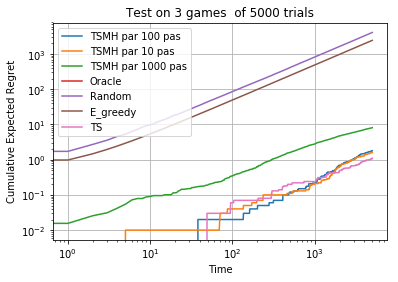

In [38]:
trials = [i for i in range(referee_TSMH_trial_5000.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_p_100_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH par 100 pas')
plt.plot(trials, np.cumsum(referee_TSMH_p_10_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH par 10 pas')
plt.plot(trials, np.cumsum(referee_TSMH_p_10000_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH par 1000 pas')
plt.plot(trials, np.cumsum(referee_Oracle_trial_5000.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_trial_5000.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_E_greedy_trial_5000.get_regret_expected(), axis=0)[trials], label='E_greedy')
plt.plot(trials, np.cumsum(referee_TS_trial_5000.get_regret_expected(), axis=0)[trials], label='TS')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

In [4]:
nb_trial = 8000
nb_game = 3
referee_TSMH_p_100_8000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_10_8000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_1000_8000trials_3games = Referee(env,nb_trial)
referee_TS_8000trials_3games = Referee(env,nb_trial)
referee_E_greedy_8000trials_3games = Referee(env,nb_trial)
referee_Oracle_trial_8000trials_3games = Referee(env,nb_trial)
referee_Random_trial_8000trials_3games = Referee(env,nb_trial)

In [6]:
for i in range(nb_game):
    print ('#### game '+str(i))
    %time print('TSMH p_100',referee_TSMH_p_100_8000trials_3games .play_game(player_TSMH_pas))
    %time print('TSMH p_10',referee_TSMH_p_10_8000trials_3games .play_game(player_TSMH_10))
    %time print('TSMH p_1000',referee_TSMH_p_1000_8000trials_3games .play_game(player_TSMH_1000))
    %time print('TS',referee_TS_8000trials_3games .play_game(player_TS))
    %time print('E_greedy',referee_E_greedy_8000trials_3games .play_game(player_E_greedy))
    %time print ('Oracle', referee_Oracle_trial_8000trials_3games .play_game(player_Oracle))
    %time print('Random',referee_Random_trial_8000trials_3games .play_game(player_Random))

#### game 0
TSMH p_100 0.0
Wall time: 19min
TSMH p_10 0.0
Wall time: 1min 48s
TSMH p_1000 0.0
Wall time: 17h 58min 26s
TS 0.020000000000000018
Wall time: 733 ms
E_greedy 0.029999999999999805
Wall time: 699 ms
Oracle 0.0
Wall time: 98.9 ms
Random 0.71
Wall time: 196 ms
#### game 1
TSMH p_100 0.0
Wall time: 25min 33s
TSMH p_10 0.0
Wall time: 2min 34s
TSMH p_1000 0.0
Wall time: 3h 50min 1s
TS 0.020000000000000018
Wall time: 497 ms
E_greedy 0.029999999999999805
Wall time: 544 ms
Oracle 0.0
Wall time: 67.3 ms
Random 0.8600000000000001
Wall time: 140 ms
#### game 2
TSMH p_100 0.0
Wall time: 17min 8s
TSMH p_10 0.0
Wall time: 1min 58s
TSMH p_1000 0.0
Wall time: 3h 29min 14s
TS 0.020000000000000018
Wall time: 466 ms
E_greedy 0.029999999999999805
Wall time: 424 ms
Oracle 0.0
Wall time: 63.8 ms
Random 0.8599999999999999
Wall time: 123 ms


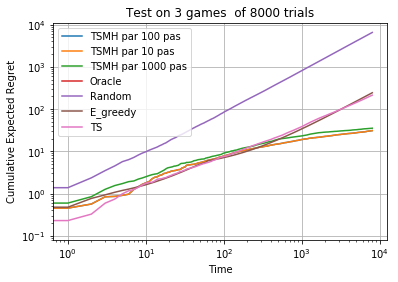

In [7]:
trials = [i for i in range(referee_TSMH_p_1000_8000trials_3games.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_p_10_8000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH par 100 pas')
plt.plot(trials, np.cumsum(referee_TSMH_p_10_8000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH par 10 pas')
plt.plot(trials, np.cumsum(referee_TSMH_p_1000_8000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH par 1000 pas')
plt.plot(trials, np.cumsum(referee_Oracle_trial_8000trials_3games.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_trial_8000trials_3games.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_E_greedy_8000trials_3games.get_regret_expected(), axis=0)[trials], label='E_greedy')
plt.plot(trials, np.cumsum(referee_TS_8000trials_3games.get_regret_expected(), axis=0)[trials], label='TS')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

### Record Logs

In [40]:
cd Test/interaction/result/eval_nb_pas/

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\eval_nb_pas


In [42]:
dict_regret_vari_pas_5000trials_3games = {'TSMH_p_100':list(referee_TSMH_p_100_5000trials_3games.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_p_10_5000trials_3games.get_regret_expected()),
 'TSMH_p_1000':list(referee_TSMH_p_1000_5000trials_3games.get_regret_expected()),
 'E_greedy':list(referee_E_greedy_trial_5000.get_regret_expected()),
 'TS':list(referee_TS_trial_5000.get_regret_expected())}


In [45]:
with open('referee_TSMH_p_100_5000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_100_5000trials_3games.record_results, file)
with open('referee_TSMH_p_10_5000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_10_5000trials_3games.record_results, file)
with open('referee_TSMH_p_1000_5000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_1000_5000trials_3games.record_results, file)
with open('referee_E_greedy_5000trials_3game.txt', 'w') as file:
    json.dump(referee_E_greedy_trial_5000.record_results, file)
with open('referee_TS_5000trials_3game.txt', 'w') as file:
    json.dump(referee_TS_trial_5000.record_results, file)
with open('regret_vari_pas_5000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_vari_pas_5000trials_3games, file)



In [46]:
dict_regret_vari_pas_1000trials_3games = {'TSMH_p_100':list(referee_TSMH.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_10.get_regret_expected()),
 'TSMH_p_1000':list(referee_TSMH_1000.get_regret_expected()),
 'E_greedy':list(referee_E_greedy.get_regret_expected()),
 'TS':list(referee_TS.get_regret_expected())}


In [47]:
with open('referee_TSMH_p_100_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH.record_results, file)
with open('referee_TSMH_p_10_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_10.record_results, file)
with open('referee_TSMH_p_1000_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_1000.record_results, file)
with open('referee_E_greedy_1000trials_3game.txt', 'w') as file:
    json.dump(referee_E_greedy.record_results, file)
with open('referee_TS_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TS.record_results, file)
with open('regret_vari_pas_1000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_vari_pas_1000trials_3games, file)



In [9]:
dict_regret_vari_pas_8000trials_3games = {'TSMH_p_100':list(referee_TSMH_p_100_8000trials_3games.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_p_10_8000trials_3games.get_regret_expected()),
 'TSMH_p_1000':list(referee_TSMH_p_1000_8000trials_3games.get_regret_expected()),
 'E_greedy':list(referee_E_greedy_8000trials_3games.get_regret_expected()),
 'TS':list(referee_TS_8000trials_3games.get_regret_expected())}


In [11]:
with open('referee_TSMH_p_100_8000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_100_8000trials_3games.record_results, file)
with open('referee_TSMH_p_10_8000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_10_8000trials_3games.record_results, file)
with open('referee_TSMH_p_1000_8000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_1000_8000trials_3games.record_results, file)
with open('referee_E_greedy_8000trials_3game.txt', 'w') as file:
    json.dump(referee_E_greedy_8000trials_3games.record_results, file)
with open('referee_TS_8000trials_3game.txt', 'w') as file:
    json.dump(referee_TS_8000trials_3games.record_results, file)
with open('regret_vari_pas_8000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_vari_pas_8000trials_3games, file)



### Annexes

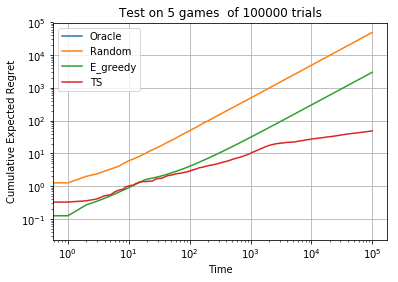

In [9]:
trials = [i for i in range(referee_TSMH_trial_100000.nb_trials)]
#plt.plot(trials, np.cumsum(referee_TSMH_trial_100000.get_regret_expected(), axis=0)[trials], label='TSMH par '+ str(pas) +" pas")
plt.plot(trials, np.cumsum(referee_Oracle_trial_100000.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_trial_100000.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_E_greedy_trial_100000.get_regret_expected(), axis=0)[trials], label='E_greedy')
plt.plot(trials, np.cumsum(referee_TS_trial_100000.get_regret_expected(), axis=0)[trials], label='TS')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        